# Introduction to neural network classification with TensorFlow


Classification problems are the problems in which an object is to be classified in one of the n classes based on the similarity index of its features with that of each class.

A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification

http://karpathy.github.io/2019/04/25/recipe/

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_sample = 1000

# Create circles
x,y = make_circles(n_sample,
                   noise=0.03,
                   random_state=128)

In [ ]:
# Check out feature
x

array([[ 0.79288655, -0.05503218],
       [-0.7261495 , -0.37955042],
       [ 0.64116005,  0.50737606],
       ...,
       [ 0.99584235, -0.16903886],
       [ 0.47213455,  0.8009664 ],
       [-0.85408257,  0.5056507 ]])

In [ ]:
# Check labels
y[:10]

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"x0":x[:,0],
                        "x1":x[:,1],
                        "label":y})

circles.head()

,x0,x1,label
0,0.792887,-0.055032,1
1,-0.726150,-0.379550,1
2,0.641160,0.507376,1
3,-0.994288,-0.213361,0
4,-0.742222,0.031813,1


In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

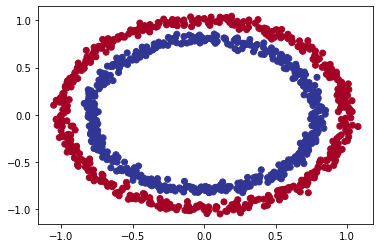

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
# Check the shape of our features and labels
x.shape,y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(x), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
x[0], y[0]

(array([ 0.79288655, -0.05503218]), 1)

## Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [ ]:
# Set the random seed
tf.random.set_seed(128)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 5.6358 - accuracy: 0.5420
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 5.5634 - accuracy: 0.5840
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 5.7379 - accuracy: 0.5280
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 5.2172 - accuracy: 0.5360
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 5.2092 - accuracy: 0.5450


In [ ]:
# Let's try and improve our model by training for longer..
model_1.fit(x,y,epochs=200,verbose=0)
model_1.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.624619960784912, 0.5]

In [ ]:
# Set the random seed
tf.random.set_seed(128)

# 1. Create the model using Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(x,y,epochs=100,verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5000


[0.6942606568336487, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [ ]:
# Set the random seed
tf.random.set_seed(128)

# 1. Create the model using Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(x,y,epochs=100,verbose=0)

In [ ]:
# 4. Evaluate the model
model_3.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.4980


[0.6992435455322266, 0.49799999594688416]

In [ ]:
import numpy as np

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features(x) and labels(y)
* Create a meshgrid of the different x values
* Make predictions across the meshgrid
* Plot the prediction as well as a line between zones(where each unique class falls).

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


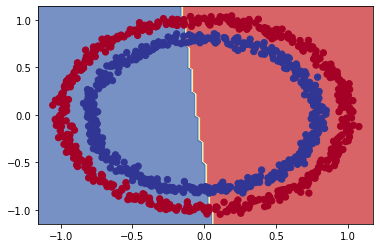

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, x, y)

In [ ]:
# Let's see if our model can be used for a regression problem...

# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [ ]:
# Set the random seed
tf.random.set_seed(128)

# 1. Create the model using Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100,verbose=0)

2/2 [==============================] - 0s 6ms/step


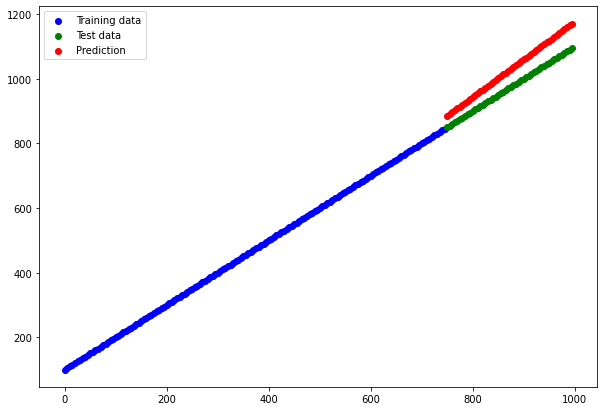

In [ ]:
# Make prediction with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions againest our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Prediction")
plt.legend();

## The missing piece: Non-Linearity

In [ ]:
# Set the random seed
tf.random.set_seed(128)

# Create a non-Linear model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history= model_4.fit(x,y,epochs=100,verbose=0)


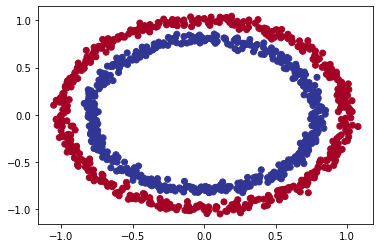

In [ ]:
# Check out our data
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 978us/step
doing binary classification


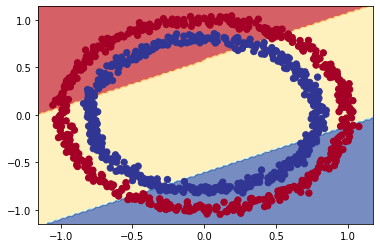

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=x,
                       y=y)

In [ ]:
# Set the random seed
tf.random.set_seed(128)

# Create a non-Linear model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history= model_5.fit(x,y,epochs=100,verbose=0)


In [ ]:
# Time to replicat the multi-layer neural network from Tensorflow playground in code..

# Set the random seed
tf.random.set_seed(128)

# Create a non-Linear model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history= model_6.fit(x,y,epochs=250,verbose=0)


In [ ]:
# Evalaute the model
model_6.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9850


[0.05320587381720543, 0.9850000143051147]

313/313 [==============================] - 1s 1ms/step
doing binary classification


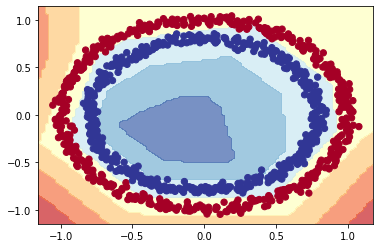

In [ ]:
# How do our model predictions look?
plot_decision_boundary(model_6, x, y)

In [ ]:
# Time to replicat the multi-layer neural network from Tensorflow playground in code..

# Set the random seed
tf.random.set_seed(128)

# Create a non-Linear model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# Fit the model
history= model_7.fit(x,y,epochs=250)


Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 0.6895 - accuracy: 0.5010
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5030
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.5070
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5390
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5270
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5150
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5130
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5140
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5210
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5280
Epoch 11/

In [ ]:
# 4. Evaluate our model
model_7.evaluate(x, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.0166 - accuracy: 1.0000


[0.016558891162276268, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification


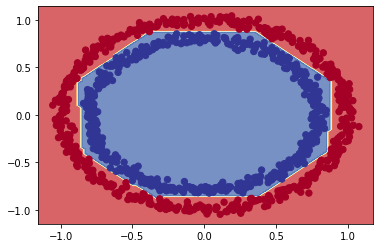

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_6,
                       X=x,
                       y=y)

In [ ]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

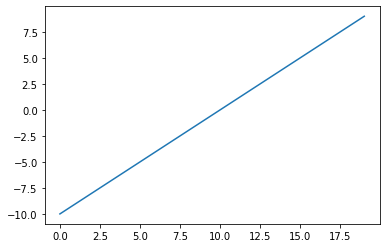

In [ ]:
# Visualize our tensor
plt.plot(A)

In [ ]:
# tensorflow sigmoid activation function
def sigmoid(x):
  return 1/(1+tf.exp(-x))


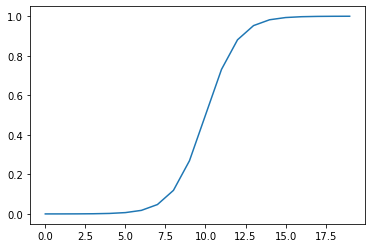

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# Create Relu activation function
def relu(x):
  return tf.maximum(0,x)

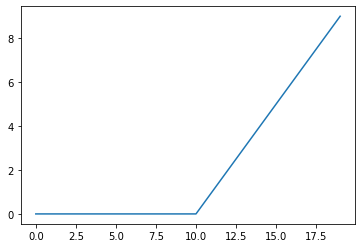

In [ ]:
plt.plot(relu(A));

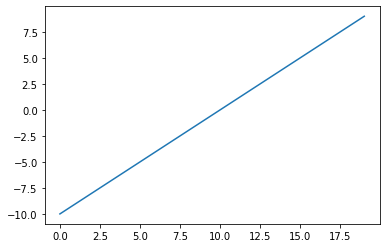

In [ ]:
plt.plot(tf.keras.activations.linear(A));

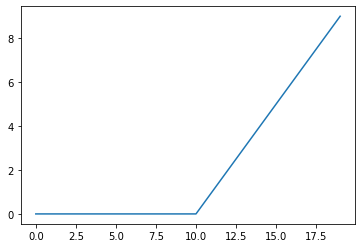

In [ ]:
plt.plot(tf.keras.activations.relu(A));

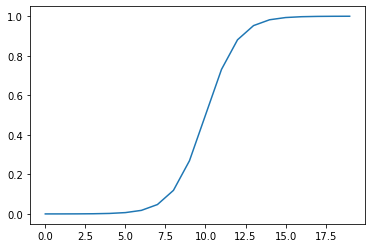

In [ ]:
plt.plot(tf.keras.activations.sigmoid(A));

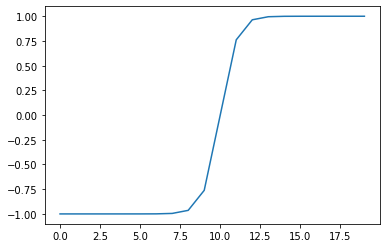

In [ ]:
plt.plot(tf.keras.activations.tanh(A));

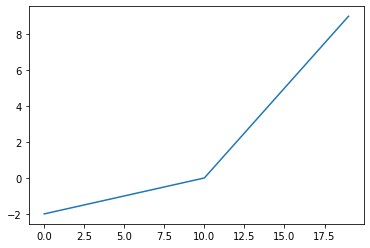

In [ ]:
plt.plot(tf.nn.leaky_relu(A));

## Evaluating and improving our classification

In [ ]:
len(x)

1000

In [ ]:
# Split into train and test sets
X_train,y_train = x[:800],y[:800]
X_test,y_test = x[800:],y[800:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                            
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=50,verbose=0)

In [ ]:
# Evalute the model on the test dataset
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 0.9650


[0.09330173581838608, 0.9649999737739563]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


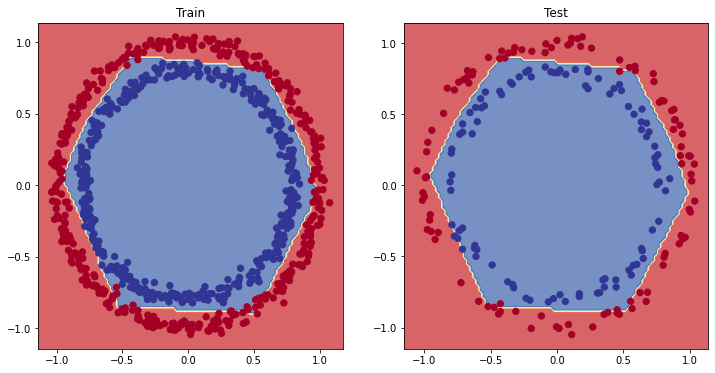

In [ ]:
# Plot the decision boundary for the train and test dataset
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show();

In [ ]:
model_8.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 4)                 12        
                                                                 
 dense_60 (Dense)            (None, 4)                 20        
                                                                 
 dense_61 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Plot the loss(or training) curves

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.697733,0.52750
1,0.691348,0.51000
2,0.687956,0.54875
3,0.681983,0.59500
4,0.677059,0.57000
5,0.666210,0.65375
6,0.651844,0.66250
7,0.628536,0.66250
8,0.596519,0.74500
9,0.556826,0.75625


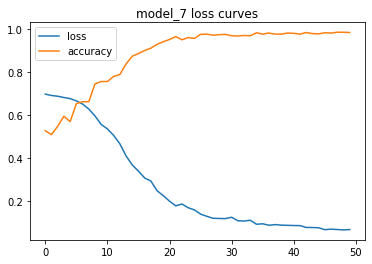

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_7 loss curves");

## Finding the best learning rate

To find theideal learning rate (the learning rate where the loss decreases the most during training time) We're going to use the following steps:

* A learning rate callback - callback is an extra piece of functionality, we can add when we training.

* Another model
* A modified loss curve plot

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train, 
                        epochs=100,
                        callbacks=[lr_scheduler],verbose=0)

In [ ]:
pd.DataFrame(history_9.history)

,loss,accuracy,lr
0,0.705201,0.49625,0.000100
1,0.704983,0.49375,0.000112
2,0.704622,0.49625,0.000126
3,0.704346,0.50000,0.000141
4,0.704009,0.50500,0.000158
...,...,...,...
95,0.854464,0.46625,5.623413
96,0.833542,0.49875,6.309574
97,0.797462,0.51125,7.079458
98,1.048906,0.47875,7.943282


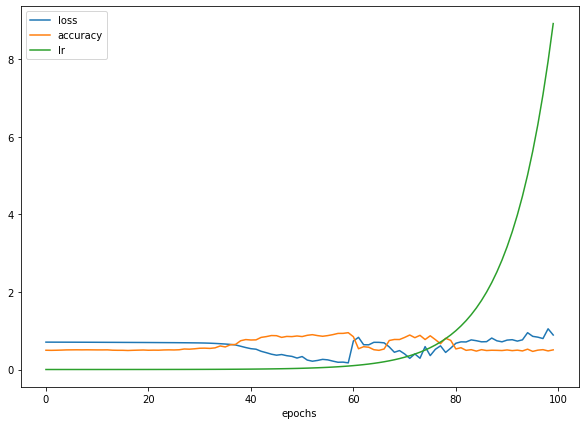

In [ ]:
# checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs");

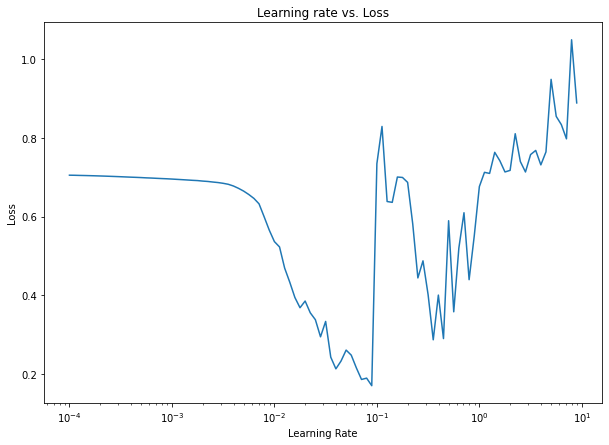

In [ ]:
# Plot the learning rate vs. loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [ ]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Learning rate we used before (model_8)
10**-2

0.01

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                             
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=100,verbose=0)

In [ ]:
# Evalute the model on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.7200


[0.6401487588882446, 0.7200000286102295]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


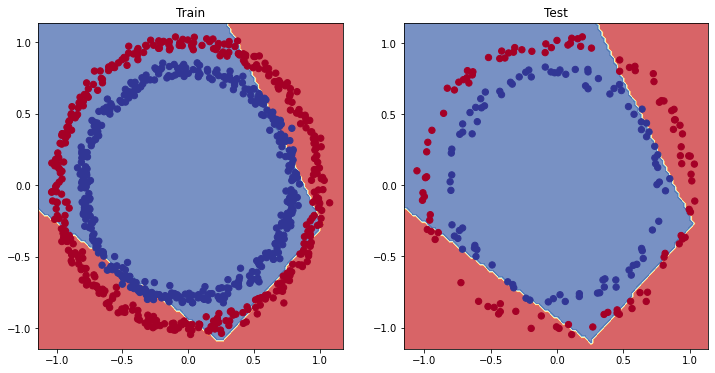

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

In [ ]:
# Make predictions
y_preds = model_10.predict(X_test)

y_preds

7/7 [==============================] - 0s 3ms/step


array([[0.59874934],
       [0.43953162],
       [0.5409999 ],
       [0.5769246 ],
       [0.6115427 ],
       [0.45010248],
       [0.5563129 ],
       [0.59132767],
       [0.6025343 ],
       [0.48594564],
       [0.49810833],
       [0.5409999 ],
       [0.5876286 ],
       [0.6397419 ],
       [0.41105384],
       [0.58872044],
       [0.58751667],
       [0.5061603 ],
       [0.5409999 ],
       [0.49445027],
       [0.50233656],
       [0.50813776],
       [0.60719097],
       [0.4081069 ],
       [0.50421816],
       [0.59551287],
       [0.622786  ],
       [0.5155469 ],
       [0.61947525],
       [0.54255164],
       [0.5851193 ],
       [0.47904167],
       [0.59557724],
       [0.49397287],
       [0.49609408],
       [0.50696456],
       [0.50266314],
       [0.5203336 ],
       [0.5083394 ],
       [0.5437064 ],
       [0.5409999 ],
       [0.536641  ],
       [0.5007219 ],
       [0.5769161 ],
       [0.46337867],
       [0.4081069 ],
       [0.5204825 ],
       [0.545

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[55, 50],
       [ 6, 89]])

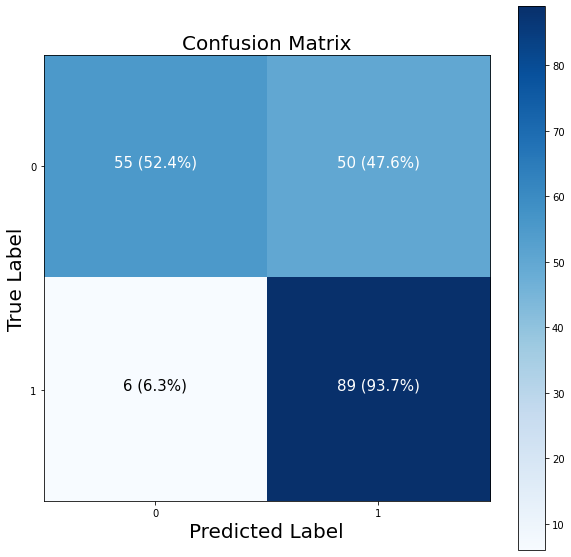

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels, 
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as multi-class classification.

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice mutli-class classificaiton, we're going to build a neural network to classify images of different items of clothing.

## Preparing the data

In [153]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test set for us
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [154]:
# Show the first training example shape
print(f"Shape of First training example: {train_data[0].shape}")
print(f"shape of first training labels: {train_labels[0].shape}")

Shape of First training example: (28, 28)
shape of first training labels: ()


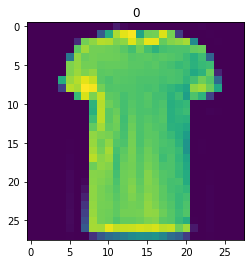

In [156]:
# Plot the single image
import matplotlib.pyplot as plt

image_index = 17
plt.imshow(train_data[image_index])
plt.title(train_labels[image_index]);

In [157]:
# Create a small list so we can index onto our training labels so they're human-readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

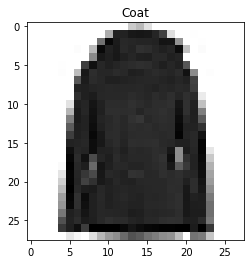

In [158]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

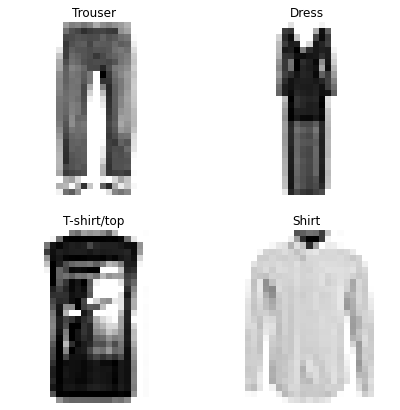

In [159]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:

* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = `tf.keras.losses.CategoricalCrosstentropy()`

  * If your labels are one-hot  encoded, use `CategoricalCrossentropy()`.
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [160]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [162]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [161]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [163]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#  Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2997 - accuracy: 0.1078 - val_loss: 2.2421 - val_accuracy: 0.1256
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0903 - accuracy: 0.1687 - val_loss: 1.8310 - val_accuracy: 0.1992
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7462 - accuracy: 0.2421 - val_loss: 1.5955 - val_accuracy: 0.3689
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4808 - accuracy: 0.3855 - val_loss: 1.4026 - val_accuracy: 0.4153
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3675 - accuracy: 0.4062 - val_loss: 1.3374 - val_accuracy: 0.4234
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3151 - accuracy: 0.4209 - val_loss: 1.2938 - val_accuracy: 0.4492
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2794 - accuracy: 0.4293 - val_loss: 1.2696 - val_accuracy:

In [164]:
# Check the model summary
model_11.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_74 (Dense)            (None, 4)                 3140      
                                                                 
 dense_75 (Dense)            (None, 4)                 20        
                                                                 
 dense_76 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [165]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

## Normalizing our data

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [166]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [167]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model 
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3758 - accuracy: 0.4436 - val_loss: 1.0968 - val_accuracy: 0.5274
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0187 - accuracy: 0.5780 - val_loss: 0.9950 - val_accuracy: 0.5855
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9456 - accuracy: 0.6335 - val_loss: 0.9327 - val_accuracy: 0.6389
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8866 - accuracy: 0.6739 - val_loss: 0.8673 - val_accuracy: 0.6790
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8468 - accuracy: 0.6912 - val_loss: 0.8510 - val_accuracy: 0.6879
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8222 - accuracy: 0.6986 - val_loss: 0.8241 - val_accuracy: 0.6973
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8053 - accuracy: 0.7050 - val_loss: 0.8006 - val_accuracy:

<Axes: title={'center': 'Normailzed data'}>

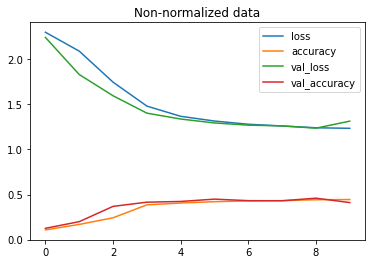

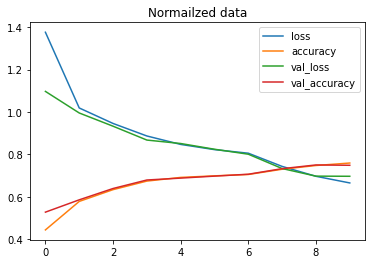

In [168]:
import pandas as pd 
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normailzed data")

## Finding the ideal learning rate

In [169]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3727 - accuracy: 0.4359 - val_loss: 0.8949 - val_accuracy: 0.6528 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7512 - accuracy: 0.7289 - val_loss: 0.6749 - val_accuracy: 0.7698 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6319 - accuracy: 0.7857 - val_loss: 0.6370 - val_accuracy: 0.7840 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5987 - accuracy: 0.7944 - val_loss: 0.6034 - val_accuracy: 0.7937 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5802 - accuracy: 0.7994 - val_loss: 0.6040 - val_accuracy: 0.7879 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5644 - accuracy: 0.8041 - val_loss: 0.6240 - val_accuracy: 0.7860 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

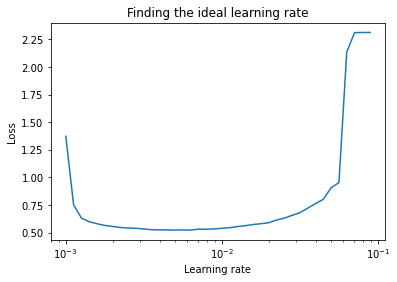

In [170]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [171]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")                       
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))


Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2582 - accuracy: 0.5578 - val_loss: 0.8663 - val_accuracy: 0.7144
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7492 - accuracy: 0.7500 - val_loss: 0.7187 - val_accuracy: 0.7555
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6590 - accuracy: 0.7761 - val_loss: 0.6694 - val_accuracy: 0.7623
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6243 - accuracy: 0.7856 - val_loss: 0.6479 - val_accuracy: 0.7758
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6112 - accuracy: 0.7887 - val_loss: 0.6395 - val_accuracy: 0.7801
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6001 - accuracy: 0.7927 - val_loss: 0.6397 - val_accuracy: 0.7862
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5927 - accuracy: 0.7952 - val_loss: 0.6546 - val_accuracy:

## Evaluating our multi-class classification model

To evlauate our multi-class classification model we could:

* Evalaute its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecutre)
*Save and export it for use in an application

In [172]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [173]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [174]:
# Make some predictions with our model 
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.7531935e-12, 7.1794798e-10, 1.8126290e-08, 1.5604328e-09,
        1.1318965e-07, 1.8747284e-01, 7.0033389e-11, 4.2554569e-01,
        1.2840271e-04, 3.8685289e-01],
       [3.2071523e-05, 3.4211097e-15, 8.9363873e-01, 2.5788593e-08,
        1.8129930e-02, 2.8029603e-14, 2.3290260e-02, 1.5554673e-30,
        6.4909115e-02, 0.0000000e+00],
       [1.1758615e-02, 9.6395910e-01, 8.9982018e-04, 1.2939907e-02,
        1.9148925e-04, 4.4754338e-03, 1.1929448e-03, 2.3174521e-03,
        8.4031827e-04, 1.4250433e-03],
       [1.1758615e-02, 9.6395910e-01, 8.9982018e-04, 1.2939907e-02,
        1.9148925e-04, 4.4754338e-03, 1.1929448e-03, 2.3174521e-03,
        8.4031827e-04, 1.4250433e-03],
       [7.3420368e-02, 2.0992695e-05, 1.9180253e-01, 5.2713513e-02,
        1.3180549e-01, 8.6040410e-07, 5.4913473e-01, 1.6993110e-16,
        1.1015872e-03, 2.5023196e-20]], dtype=float32)

In [175]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([3.7531935e-12, 7.1794798e-10, 1.8126290e-08, 1.5604328e-09,
        1.1318965e-07, 1.8747284e-01, 7.0033389e-11, 4.2554569e-01,
        1.2840271e-04, 3.8685289e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 'Sneaker')

In [176]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([7, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [177]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [178]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[752,  27,  29,  74,   4,   0, 100,   0,  14,   0],
       [  6, 947,   5,  30,   3,   2,   1,   1,   5,   0],
       [ 18,   4, 634,  19, 196,   0,  91,   0,  38,   0],
       [ 31,  38,  12, 795,  40,  10,  62,   1,  10,   1],
       [  2,   0, 115,  42, 759,   4,  56,   0,  22,   0],
       [  0,   2,   0,   0,   0, 864,   0,  66,  23,  45],
       [141,   8, 165,  68, 165,   1, 423,   0,  29,   0],
       [  0,   0,   0,   0,   0,  34,   0, 943,   0,  23],
       [  9,   5,  27,   7,   4,  10,   4,  10, 924,   0],
       [  0,   0,   1,   0,   0,  23,   0,  63,   0, 913]])

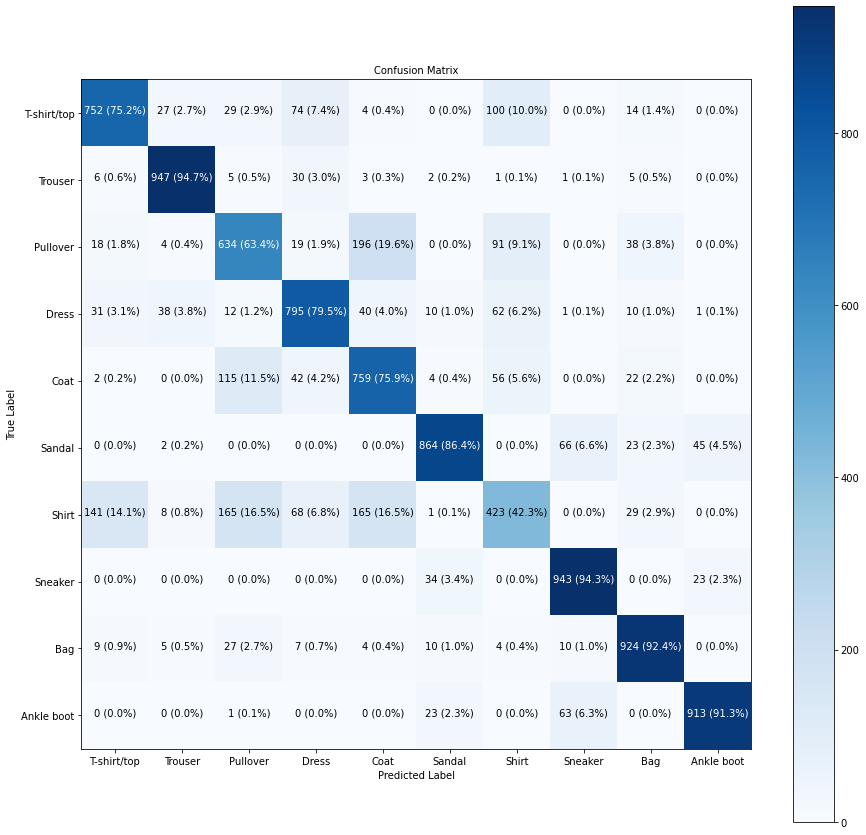

In [179]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [180]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong
     

1/1 [==============================] - 0s 22ms/step


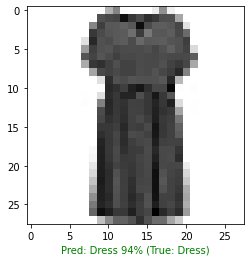

In [182]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on 
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [183]:
# Find the layers of our most recent model
model_14.layers

In [184]:
# Extract a particular layer
model_14.layers[1]

In [186]:
# Get the patterns of a layer in our network
weigths, biases = model_14.layers[1].get_weights()

# Shapes
weigths, weigths.shape

(array([[-0.6891025 ,  0.48501912, -0.18708503,  0.16563067],
        [-0.35039568,  0.9477455 ,  0.01199144,  0.36911923],
        [-0.92577875,  0.7195653 ,  0.9082216 , -0.36052445],
        ...,
        [-0.11270596,  0.33430573,  0.25285977, -0.90372086],
        [ 0.17760074,  0.8704688 , -0.3795108 , -0.44930318],
        [-0.55908   ,  0.21803598,  0.37014434, -0.6505958 ]],
       dtype=float32), (784, 4))

In [187]:
model_14.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_83 (Dense)            (None, 4)                 3140      
                                                                 
 dense_84 (Dense)            (None, 4)                 20        
                                                                 
 dense_85 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [188]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.71006685,  0.22913831,  1.521078  , -2.1703193 ], dtype=float32),
 (4,))

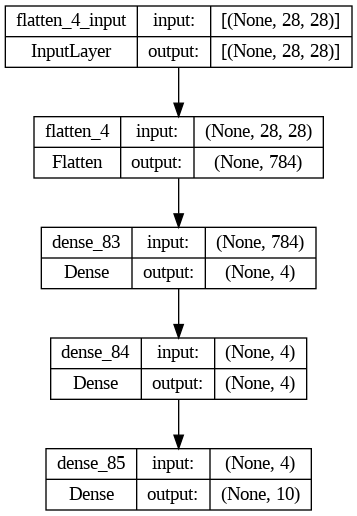

In [189]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)